In [1]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

from models import *
from utils import *
from datasets import *

In [2]:
z = np.load("./umap_data_reducted_normalised.npy")
z.shape

(70000, 3)

In [37]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1e-2, min_samples=10).fit(z[:,:2])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 368


In [41]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(min_samples=10, min_cluster_size=500).fit(z[:, :2])
labels = hdb.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 230


In [51]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=10).fit(z[:, :2])
labels = kms.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 0


In [56]:
import hdbscan

labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(z[:, :2])

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 1295


In [58]:
draw_z(z=z[:,:2], cls=labels, s=1)

<Figure size 15000x15000 with 0 Axes>

<Figure size 15000x15000 with 0 Axes>

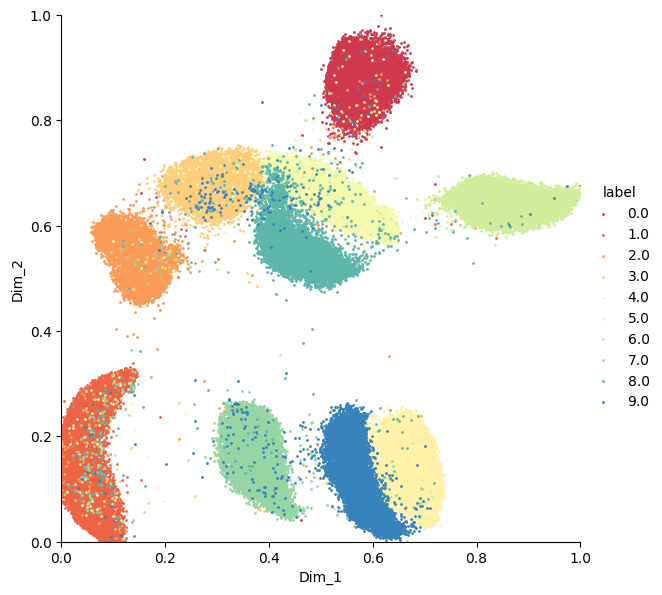

In [7]:
draw_z(z=z[:,:2], cls=z[:,2], s=1)